In [3]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

In [4]:
#!pip install pandas

# 이미지 경로가 절대경로로 저장

In [26]:
def xml_to_csv_abspath(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        for member in root.findall('object'):
            value = (path +root.find('filename').text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text),
                     member[0].text,
                     )
            xml_list.append(value)
    column_name = ['filename', 'xmin','ymin','xmax', 'ymax', 'class']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


# 이미지 경로가 상대경로로 저장

In [28]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()

        for member in root.findall('object'):
            value = ('data/' +root.find('filename').text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text),
                     member[0].text,
                     )
            xml_list.append(value)
    column_name = ['filename', 'xmin','ymin','xmax', 'ymax', 'class']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


In [29]:
os.getcwd()

'c:\\auto_ml'

## 상대경로 결과

In [103]:
image_path = os.path.join(os.getcwd(), 'data/')
dataset_df = xml_to_csv(image_path)
dataset_df.to_csv(os.path.join(image_path, 'annotations_all.csv'), index=False, header=None)

In [87]:
dataset_df.head()

,filename,xmin,ymin,xmax,ymax,class
0,data/hand_000.png,49,10,172,224,hand
1,data/hand_001.png,43,15,161,222,hand
2,data/hand_002.png,2,39,102,223,hand
3,data/hand_003.png,1,77,59,223,hand
4,data/hand_004.png,22,51,115,224,hand


In [88]:
dataset_df.tail()

,filename,xmin,ymin,xmax,ymax,class
146,data/hand_146.png,98,37,191,215,hand
147,data/hand_147.png,71,41,159,220,hand
148,data/hand_148.png,99,48,192,218,hand
149,data/hand_149.png,104,38,195,223,hand
150,data/hand_150.png,19,67,108,219,hand


## 절대경로 결과

In [104]:
image_path = os.path.join(os.getcwd(), 'data/')
dataset_df_abs = xml_to_csv_abspath(image_path)
dataset_df_abs.to_csv(os.path.join(image_path, 'annotations_abs_all.csv'), index=False, header=None)

In [90]:
dataset_df_abs.shape

(151, 6)

In [91]:
dataset_df_abs.head()

,filename,xmin,ymin,xmax,ymax,class
0,c:\auto_ml\data/hand_000.png,49,10,172,224,hand
1,c:\auto_ml\data/hand_001.png,43,15,161,222,hand
2,c:\auto_ml\data/hand_002.png,2,39,102,223,hand
3,c:\auto_ml\data/hand_003.png,1,77,59,223,hand
4,c:\auto_ml\data/hand_004.png,22,51,115,224,hand


In [92]:
dataset_df_abs.tail()

,filename,xmin,ymin,xmax,ymax,class
146,c:\auto_ml\data/hand_146.png,98,37,191,215,hand
147,c:\auto_ml\data/hand_147.png,71,41,159,220,hand
148,c:\auto_ml\data/hand_148.png,99,48,192,218,hand
149,c:\auto_ml\data/hand_149.png,104,38,195,223,hand
150,c:\auto_ml\data/hand_150.png,19,67,108,219,hand


# 학습데이터 확인

In [93]:
import skimage.io as io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.patches as patches

%matplotlib inline

In [94]:
def showObjects(image_df):

    img_path = image_df.filename

    image = io.imread(img_path)
    draw = image.copy()
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(draw)
    rect = patches.Rectangle((image_df.xmin,image_df.ymin),image_df.xmax-image_df.xmin,image_df.ymax-image_df.ymin,linewidth=1,edgecolor='r',facecolor='none')

    plt.axis('off')
    ax.add_patch(rect)
    plt.show()

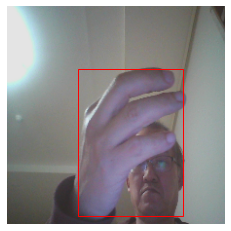

In [95]:
showObjects(dataset_df.iloc[120])

In [96]:
# 학습데이터와 검즏데이터 분리

In [105]:
# DIVIDIR DATASET
train_df, test_df = train_test_split(
  dataset_df, 
  test_size=0.2, 
  random_state=2
)


In [106]:
print(train_df.shape)

(120, 6)


In [107]:
print(test_df.shape)

(31, 6)


In [109]:
# CREAR ARCHIVOS CSV
train_df.to_csv('data/annotations.csv', index=False, header=None)
test_df.to_csv('data/annotations_test.csv', index=False, header=None)

In [110]:
classes = set(['hand'])
print(classes)

{'hand'}


In [111]:
with open('data/classes.csv', 'w') as f:
    for i, line in enumerate(sorted(classes)):
        f.write('{},{}\n'.format(line,i))